#  Seaborn

## Was is seaborn?
- Seaborn ist eine kostenlose Open Source Bibliothek um anspruchsvolle Graphen in Python zu erzeugen.
- Ermöglcht Darstellungen die mit Pandas nicht möglich sind. 

## Installation

- Mit `pip install seaborn`

und dann...

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Datensatz einlesen

- Der berühmteste Testdatensatz bei Wissenschaftlern ist der Iris Datensatz. Es handelt sich um Blumenarten und ihre Klassifikation. 

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Verteilungen

## Histogramme

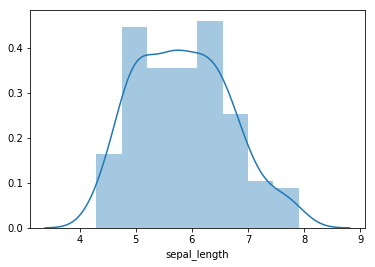

In [3]:
# Make default histogram of sepal length
sns.distplot( df["sepal_length"] )

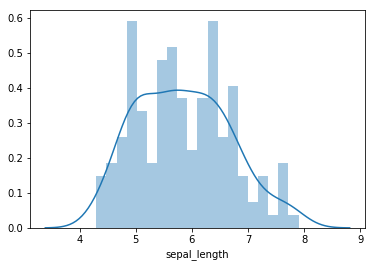

In [4]:
# Control the number of bins
sns.distplot( df["sepal_length"], bins=20 )

## Violinplot

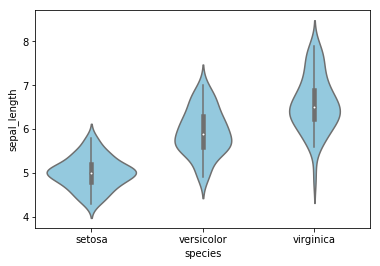

In [5]:
sns.violinplot( x=df["species"], y=df["sepal_length"], color="skyblue")

## Violinplot mit versch. Farben

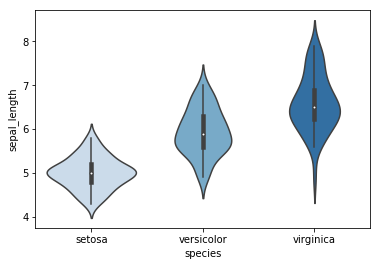

In [6]:
sns.violinplot( x=df["species"], y=df["sepal_length"], palette="Blues")

## Stripplot

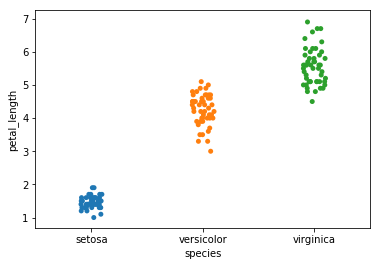

In [4]:
sns.stripplot(x="species", y="petal_length",data=df)

# Korrelation

## Scatterplot mit Regression

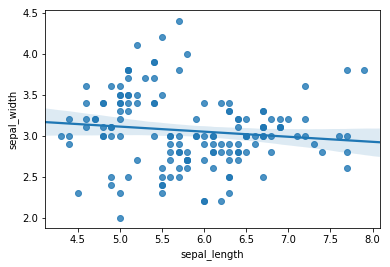

In [7]:
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])

## Scatterplot ohne Regression

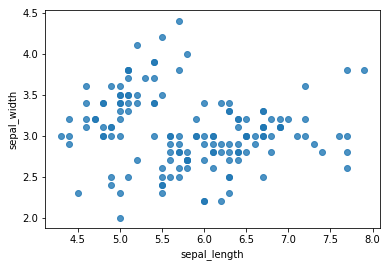

In [8]:
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False)

## Scatterplott mit merheren Gruppen

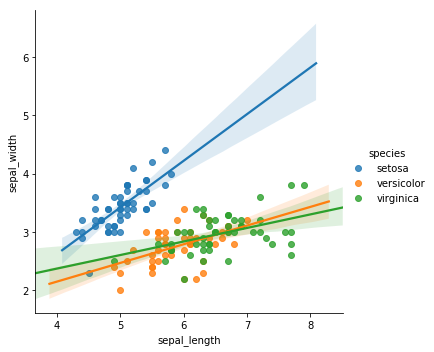

In [9]:
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=True, hue='species', legend=True)

## Scatterplot mit Legende im Graphen

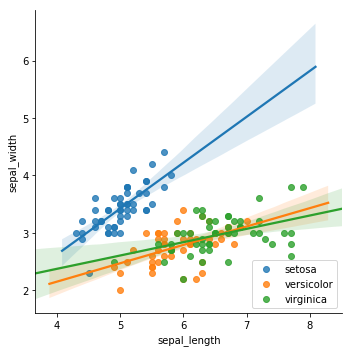

In [10]:
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=True, hue='species', legend=False)
plt.legend(loc='lower right')

## Scatterplot mit definierten Farben

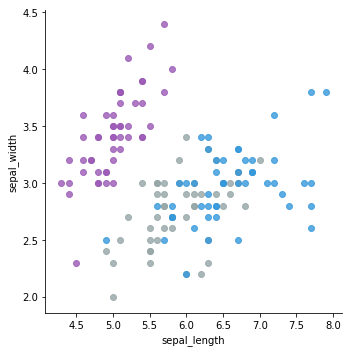

In [11]:
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False, palette=dict(setosa="#9b59b6", virginica="#3498db", versicolor="#95a5a6"))


## Scatterplott mit Annotierung

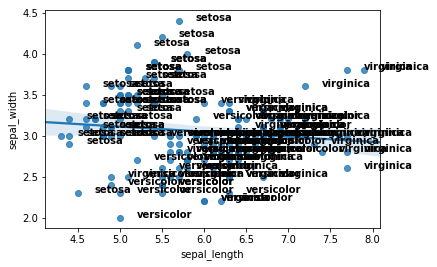

In [12]:
ax = sns.regplot(x=df["sepal_length"], y=df["sepal_width"])
for line in range(0,df.shape[0]):
     ax.text(df.sepal_length[line]+0.2, df.sepal_width[line], df.species[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

## Heatmap

- Wie stark sind die einzelnen eigenschaften miteinander korreliert?

In [13]:
cor = df.corr()
cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


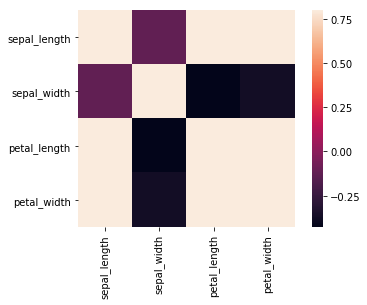

In [14]:
sns.heatmap(cor, vmax=.8, square=True)

## Heatmap: Beispiel 2 mit BIPs
- Wie stark verändern sich die BIPs der einzelnen Kantone über die Jahre?

In [24]:
# BIPs einlesen
df2 = pd.read_excel("bip_region.xlsx")
# Kippen
df_gekippt = df2.set_index('Kanton',inplace=False)
df_gekippt = df_gekippt.T
df_gekippt.head()

Kanton,Zürich,Bern,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,Freiburg,...,Graubünden,Aargau,Thurgau,Tessin,Waadt,Wallis,Neuenburg,Genf,Jura,Schweiz
2008,131359.74779,72750.56084,22720.98898,1752.93465,8223.13524,2178.22561,2464.94304,2497.85406,15704.93243,16039.88321,...,12615.50487,37774.52858,14312.76458,25983.31954,45311.33112,15969.31827,13339.12987,46700.80837,4266.35684,600431.09294
2009,128598.48877,71584.86949,22245.78158,1757.71788,8338.64153,2165.70466,2453.00679,2429.59366,15597.93402,15647.52388,...,12637.89176,36943.54089,13928.47050,25456.13959,45287.96229,16344.40063,12493.88700,45413.49318,4007.11178,589213.22310
2010,130100.59227,74219.89185,23810.92673,1777.83485,8479.15799,2315.14044,2666.92107,2495.72236,17188.26026,16210.29069,...,13065.40866,37664.96637,14734.43121,26263.94483,47234.81841,16860.88825,12892.09480,47078.98457,4137.38350,608830.56353
2011,133064.84582,75300.71702,24165.45463,1841.33727,8453.44582,2344.47030,2722.43704,2555.84703,17360.24209,16590.79792,...,13352.88854,38505.31274,15213.68411,26807.31416,48735.92628,17071.77462,13938.81158,47085.34327,4282.68896,621256.12120
2012,134962.96311,74749.24554,24604.05894,1816.73788,8550.76716,2335.90088,2741.98700,2562.83471,17546.61466,16670.02007,...,13511.90219,38719.76854,15345.08658,27274.20299,49525.04708,17094.52958,14435.48209,47060.39800,4367.07727,626414.12945


In [25]:
# Correlation
corr = df_gekippt.corr()

In [16]:
corr

Kanton,Zürich,Bern,Luzern,Uri,Schwyz,Obwalden,Nidwalden,Glarus,Zug,Freiburg,...,Graubünden,Aargau,Thurgau,Tessin,Waadt,Wallis,Neuenburg,Genf,Jura,Schweiz
Kanton,,,,,,,,,,,,,,,,,,,,,
Zürich,1.000000,0.938753,0.953404,0.922486,0.923711,0.842907,0.926953,0.987504,0.856884,0.980695,...,0.938452,0.987329,0.952314,0.986284,0.956061,0.845094,0.988587,0.784679,0.970701,0.978386
Bern,0.938753,1.000000,0.985136,0.938882,0.914570,0.954865,0.976242,0.965206,0.923376,0.967205,...,0.964969,0.961623,0.980773,0.963444,0.972526,0.925440,0.926489,0.868848,0.909141,0.983045
Luzern,0.953404,0.985136,1.000000,0.939029,0.938797,0.959279,0.988263,0.964469,0.949221,0.966937,...,0.986048,0.963779,0.989132,0.976324,0.990485,0.946527,0.943952,0.844692,0.911110,0.991724
Uri,0.922486,0.938882,0.939029,1.000000,0.928771,0.916457,0.930561,0.926206,0.891736,0.923619,...,0.935152,0.912712,0.930037,0.920423,0.945604,0.939941,0.924744,0.681743,0.837389,0.940517
Schwyz,0.923711,0.914570,0.938797,0.928771,1.000000,0.864673,0.931929,0.931003,0.870163,0.951630,...,0.919565,0.902004,0.894426,0.943968,0.936369,0.915663,0.879881,0.666504,0.847892,0.929736
Obwalden,0.842907,0.954865,0.959279,0.916457,0.864673,1.000000,0.952453,0.865853,0.942560,0.869624,...,0.946005,0.866323,0.946296,0.879624,0.941301,0.971516,0.852448,0.803940,0.775644,0.925648
Nidwalden,0.926953,0.976242,0.988263,0.930561,0.931929,0.952453,1.000000,0.954776,0.973250,0.959602,...,0.991656,0.953450,0.984954,0.968683,0.988567,0.948895,0.909211,0.851099,0.897973,0.981140
Glarus,0.987504,0.965206,0.964469,0.926206,0.931003,0.865853,0.954776,1.000000,0.892296,0.995568,...,0.949694,0.994569,0.966064,0.993636,0.962800,0.856693,0.965143,0.839896,0.976392,0.987077
Zug,0.856884,0.923376,0.949221,0.891736,0.870163,0.942560,0.973250,0.892296,1.000000,0.886663,...,0.959607,0.892661,0.953315,0.906690,0.942871,0.925603,0.853235,0.841375,0.832520,0.931920


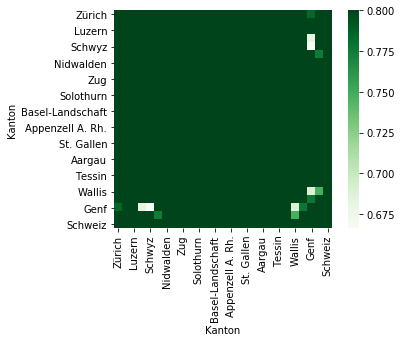

In [17]:
sns.heatmap(corr, vmax=.8, square=True,cmap="Greens")

## Heatmap Beispiel 3

In [29]:
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [30]:
flights = flights_long.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


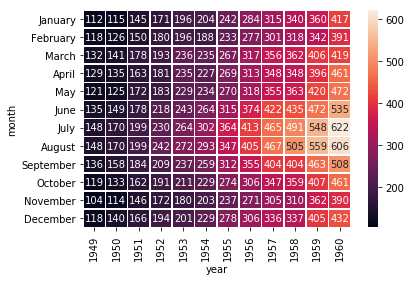

In [32]:
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

## Korrelogram ( sehr akademisch...)

- Wo gibt es lineare Zusammenhänge zwischen den Variablen?

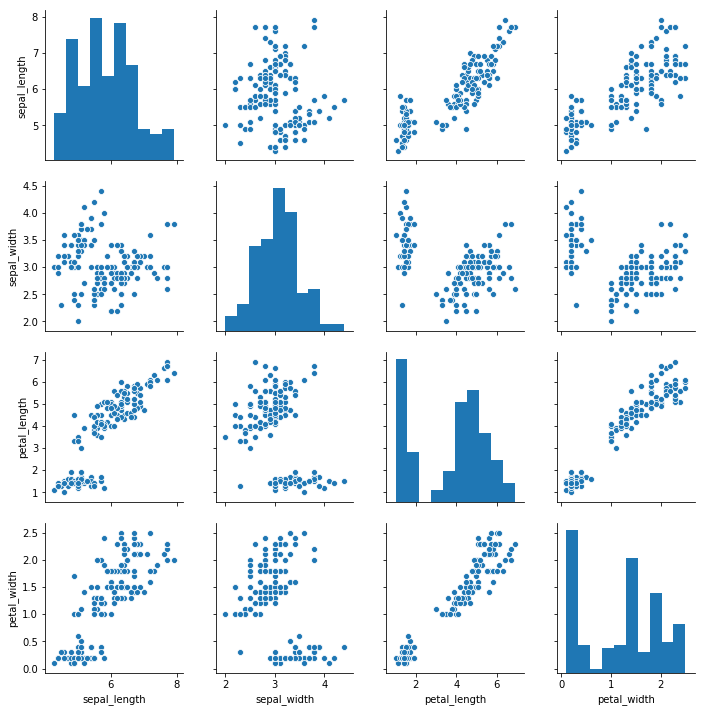

In [18]:
sns.pairplot(df)

# Ranking 
- Bei klassischen Graphen hat es keine Vorteile Seaborn zu benutzen. Die Resultate sind genauso gut. Siehe unten. 

## Barchart

In [19]:
df_bip = pd.read_csv("bip_basel.csv")
df_bip.head()

,Jahr,Bruttoinlandprodukt
0,1980,8219.2
1,1981,8754.3
2,1982,9459.6
3,1983,9879.3
4,1984,10619.4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

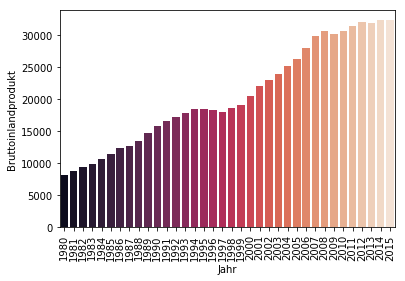

In [20]:
sns.barplot(x=df_bip.Jahr, y=df_bip.Bruttoinlandprodukt, palette="rocket")
plt.xticks(rotation=90)

## Linechart

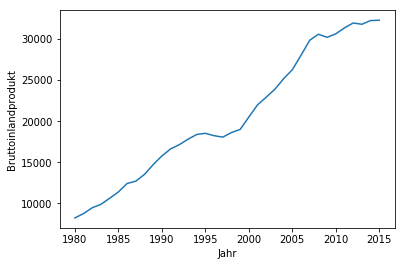

In [23]:
sns.lineplot(x=df_bip.Jahr, y=df_bip.Bruttoinlandprodukt,data=df_bip)

## Treemaps

Installieren mit `pip install squarify`

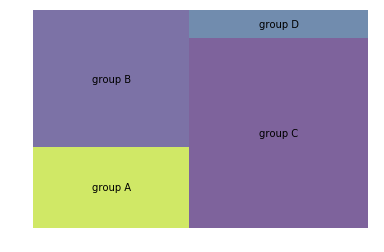

In [9]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.axis('off')
plt.show()

In [10]:
# If you have a data frame?
import pandas as pd
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
df

,group,nb_people
0,group A,8
1,group B,3
2,group C,4
3,group D,2


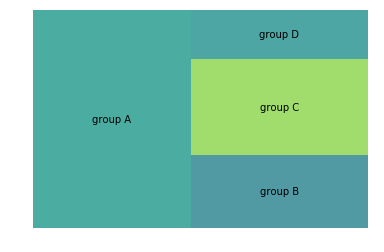

In [11]:
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

# Mehr Infos
- https://python-graph-gallery.com